In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros, simplify
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib notebook


# Linear algebra

## Session 11: 

## Gerhard Jäger

### July 20, 2022

In [26]:
A = np.array([
    [1,2],
    [2,1]
])

<IPython.core.display.Javascript object>


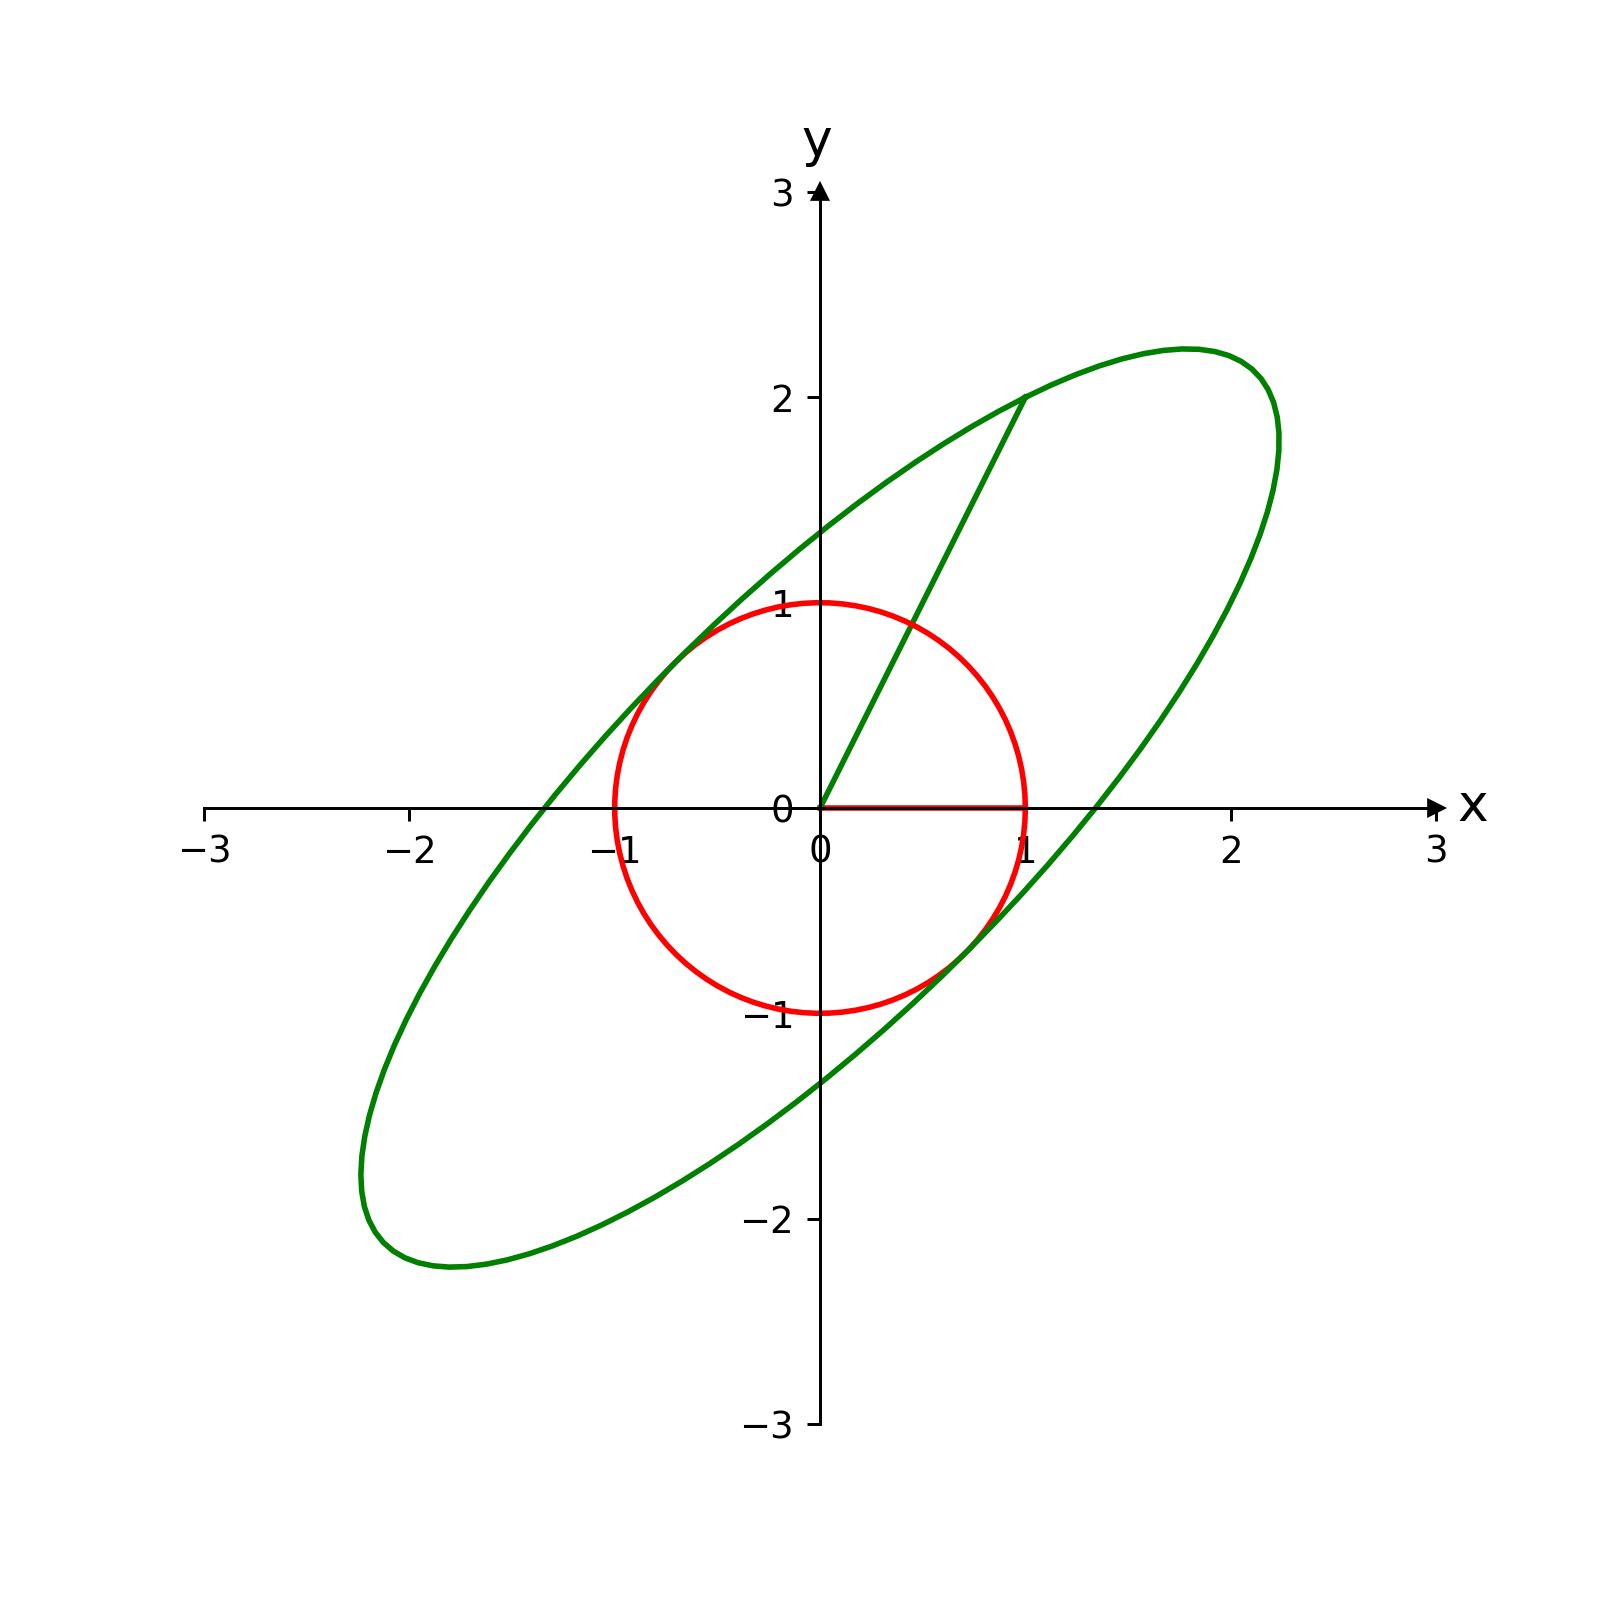

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.01), Output())…

In [27]:

def g(A, theta):
    a, c = np.cos(theta), np.sin(theta)
    x = np.linspace(0, a, 100)
    y = np.linspace(0, c, 100)
    b, d = A @ np.array([a,c])
    z = np.linspace(0, b, 100)
    w = np.linspace(0, d, 100)
    return x, y, z, w

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -2, 2, -2, 2
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

x, y, z, w = g(A, 0)
line1, = ax.plot(x,y, color='red')
line2, = ax.plot(z,w, color='green')

angles = np.linspace(0, 2*np.pi, 100)
crc = np.array([np.cos(angles), np.sin(angles)])
elps = A @ crc
ax.plot(crc[0,:], crc[1,:], color='red')
ax.plot(elps[0,:], elps[1,:], color='green')

def update(theta = 0):
    x, y, z, w = g(A,theta)
    print("x = "+str(x[-1])+","+str(y[-1]))
    print("y = "+str(z[-1])+","+str(w[-1]))
    line1.set_data(x, y)
    line2.set_data(z, w)
    fig.canvas.draw_idle()
    
interact(update, theta = (0, 2*np.pi, 0.01));

So far we studied basic operations such as addition and multiplication of matrices and vectors.

Higher operations are also defined, at least for square matrices:

- power
    - $A^0 = \mathbf I$
    - $A^{n+1} = A A^n$
- exponential
    - $e^A = \sum_{k=0}^\infty \frac{1}{k!} A^k$

To compute them efficiently (and for many other applications), 
we need **eigenvectors** and **eigenvalues** of square matrices.

## Example

In [4]:
A = Matrix([
    [0.8, 0.3],
    [0.2, 0.7]
])
A

Matrix([
[0.8, 0.3],
[0.2, 0.7]])

In [5]:
A**2

Matrix([
[0.7, 0.45],
[0.3, 0.55]])

In [6]:
A**3

Matrix([
[0.65, 0.525],
[0.35, 0.475]])

In [7]:
A**10

Matrix([
[0.600390625, 0.5994140625],
[0.399609375, 0.4005859375]])

In [8]:
A**100

Matrix([
[0.600000000000002, 0.600000000000002],
[0.400000000000001, 0.400000000000001]])

In [9]:
A**1000000

Matrix([
[0.6, 0.6],
[0.4, 0.4]])

### Basic equation

$$
A\mathbf x = \lambda \mathbf x
$$

- $\mathbf x$ is called an **eigenvector** of $A$
- $\lambda$ is called an **eigenvalue** of $A$

### Example: How to find eigenvalues and eigenvectors

$$
\begin{aligned}
A &= \left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\\
A\mathbf x &= \lambda \mathbf x\\
&= \lambda \mathbf I x\\
(A-\lambda \mathbf I)\mathbf x &= \mathbf 0 
\end{aligned}
$$

The important matrix now is

$$
A-\lambda \mathbf I = \begin{bmatrix}
0.8-\lambda & 0.3\\
0.2 & 0.7-\lambda
\end{bmatrix}
$$

We are looking for a value of $\lambda$ such that
$$
(A-\lambda \mathbf I)\mathbf x = \mathbf 0 
$$

with $\mathbf x \neq \mathbf 0$ (otherwise the equation would be trivial).

It follows that $(A-\lambda \mathbf I)$ is not invertible. Hence:

$$
|(A-\lambda \mathbf I)| = 0
$$

Using the formula for the determinant of a $2\times 2$ matrix:

$$
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 = 0
$$


Simplifying:

$$
\begin{aligned}
(0.8-\lambda)(0.7-\lambda) - 0.2\times 0.3 &= 0\\
\lambda ^2 - 1.5\lambda + 0.56 - 0.06 &= 0\\
\lambda^2 - 1.5\lambda + 0.5 &= 0
\end{aligned}
$$

There is a formula for finding the solution of quadratic equations (https://en.wikipedia.org/wiki/Quadratic_equation):

$$
\begin{aligned}
\lambda_{1/2} = \frac{3}{4} \pm \sqrt{(\frac{3}{4})^2-\frac{1}{2}}\\
&= \frac{3}{4} \pm \sqrt{\frac{9-8}{16}}\\
&= \frac{3}{4} \pm \sqrt{\frac{1}{16}}\\
&= \frac{3}{4} \pm \frac{1}{}4\\
\lambda_1 &= 1\\
\lambda_2 &= 0.5
\end{aligned}
$$

$\lambda_1$ and $\lambda_2$ are the eigenvalues of $A$. Now let's find the corresponding eigenvectors.

This amount to finding the nullspace of $A-\lambda\mathbf I$:

- $\lambda_1$

$$
\begin{aligned}
(A - \lambda_1\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0.2 & -0.3
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
-0.2 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
1 & -1.5\\
0 & 0
\end{bmatrix}\mathbf x_1 &= \mathbf 0\\
\mathbf x_1 &= \begin{bmatrix}1.5\\1\end{bmatrix}
\end{aligned}
$$




- $\lambda_2$

$$
\begin{aligned}
(A - \lambda_1\mathbf I)\mathbf x_1 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0.2 & 0.2
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
0.3 & 0.3\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\begin{bmatrix}
1 & 1\\
0 & 0
\end{bmatrix}\mathbf x_2 &= \mathbf 0\\
\mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

$\mathbf x_1$ is the eigenvector *corresponding to* $\lambda_1$.

$\mathbf x_2$ is the eigenvector *corresponding to* $\lambda_2$.

Any non-zero multiples of $\mathbf x_1, \mathbf x_2$ are also eigenvectors. It is common practice to use normalized eigenvectors, i.e.\ eigenvectors with length 1.

$$
\begin{aligned}
\mathbf v_1 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{13}}\begin{bmatrix}3\\2\end{bmatrix}\\
\mathbf v_2 &= \frac{\mathbf x_1}{||\mathbf x_1||}\\
&= \frac{1}{\sqrt{2}}\begin{bmatrix}-1\\1\end{bmatrix}\\
\end{aligned}
$$

In [10]:
A = Matrix([
    [Rational(4,5), Rational(3,10)],
    [Rational(1,5), Rational(7,10)]
])
A

Matrix([
[4/5, 3/10],
[1/5, 7/10]])

In [11]:
e1, e2 = A.eigenvects()

In [12]:
lambda1, _, v1 = e1

In [13]:
lambda1

1/2

In [14]:
v1[0].normalized()

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2]])

In [15]:
lambda2, _, v2 = e2

In [16]:
lambda2

1

In [17]:
v2[0].normalized()

Matrix([
[3*sqrt(13)/13],
[2*sqrt(13)/13]])

In [18]:
A = np.array([
    [0.8, 0.3],
    [0.2, 0.7]
])
A

array([[0.8, 0.3],
       [0.2, 0.7]])

In [19]:
np.linalg.eig(A)

(array([1. , 0.5]),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))



### Procedure to find eigenvalues and eigenvectors:

1. Construct $A-\lambda \mathbf I$ with $\lambda$ as unknown.
2. Set $|A-\lambda \mathbf I| = 0$ and solve for $\lambda$. All solutions are eigenvalues.
3. For each solution for $\lambda$, find the nullspace of $|A-\lambda \mathbf I| = 0$. Each vector in the nullspace is an eigenvector corresponding to this solution.

##### Example 2: Projection matrix

$$
A = \begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{1}{2}-\lambda & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{1}{2}-\lambda)^2 - \frac{1}{4} &= 0\\
\lambda^2 -\lambda &= 0\\
\lambda(\lambda-1) &= 0\\
\lambda_1 &= 1\\
\lambda_2 &= 0
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -\frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & -\frac{1}{2}
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    \frac{1}{2} & \frac{1}{2}\\
    \frac{1}{2} & \frac{1}{2}
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 3: Reflection matrix

$$
A = \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-\lambda & 1\\
1 & -\lambda
\end{vmatrix} &= 0\\
\lambda^2-1 &= 0\\
\lambda^2 &= 1\\
\lambda_1 &= 1\\
\lambda_2 &= -1
\end{aligned}
$$

- find eigenvectors

    - $\lambda_1$: 
    $$
    \begin{aligned}
    \begin{bmatrix}
    -1 & 1\\
    1 & -1
    \end{bmatrix}\mathbf x_1 &= \mathbf 0\\
    \mathbf x_1 &= \begin{bmatrix}1\\1\end{bmatrix}
    \end{aligned}
    $$
    
    - $\lambda_2$:
    $$
    \begin{aligned}
    \begin{bmatrix}
    1 & 1\\
    1 & 1
    \end{bmatrix}\mathbf x_2 &= \mathbf 0\\
    \mathbf x_2 &= \begin{bmatrix}-1\\1\end{bmatrix}
    \end{aligned}
    $$

##### Example 3: Rotation matrix

$$
A = \begin{bmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
\frac{\sqrt{2}}{2}-\lambda & \frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}-\lambda
\end{vmatrix} &= 0\\
(\frac{\sqrt{2}}{2}-\lambda)^2 + \frac{1}{2} &= 0\\
\lambda^2 - \sqrt{2}\lambda + 1 &= 0\\
\lambda_{1/2} &= \frac{\sqrt{2}}{2} \pm \sqrt{\frac{1}{2} - 1}\\
 &= \frac{\sqrt{2}}{2} \pm \sqrt{-\frac{1}{2}}
\end{aligned}
$$

**There is no solution within the real numbers!**

(There are complex eigenvalues – and complex eigenvectors – for this matrix, but this is beyond the scope of this course.)

##### Example 4: Multiple eigenvalues
$$
A = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
1-\lambda & 0\\
0 & 1-\lambda
\end{vmatrix} &= 0\\
(1-\lambda)^2 &= 0\\
1-\lambda &= 0\\
\lambda &= 1
\end{aligned}
$$

- find eigenvectors

$$
\begin{bmatrix}
0 & 0\\
0 & 0
\end{bmatrix}\mathbf x = \mathbf 0
$$

**Any vector is an eigenvector of the identity matrix.**

##### Example 5: Defective eigenvalues

$$
A = \begin{bmatrix}
1 & 1\\
0 & 1
\end{bmatrix}
$$

- find eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
1-\lambda & 1\\
0 & 1-\lambda
\end{vmatrix} &= 0\\
(1-\lambda)^2 &= 0\\
1-\lambda &= 0\\
\lambda &= 1
\end{aligned}
$$

- find eigenvectors

$$
\begin{aligned}
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
\mathbf x &= \mathbf 0\\
\mathbf x &= \begin{bmatrix}1\\0\end{bmatrix}
\end{aligned}
$$

**This matrix has only one eigenvalue and one eigenvector.**

### Larger matrices

$$
A = \begin{bmatrix}
-1 & 2 & 2\\
2 & 2 & -1\\
2 & -1 & 2
\end{bmatrix}
$$

- finding eigenvalues

$$
\begin{aligned}
\begin{vmatrix}
-1-\lambda & 2 & 2\\
2 & 2-\lambda & -1\\
2 & -1 & 2-\lambda
\end{vmatrix} &= 0\\
(-1-\lambda)(2-\lambda)^2 -4 -4 -4(2-\lambda)-4(2-\lambda) + 1 + \lambda &= 0\\
-\lambda^2+4\lambda-4-\lambda^3+4\lambda^2-4\lambda -4 -4 -8+4\lambda-8+4\lambda + 1 + \lambda &= 0\\
-\lambda^3 + 3\lambda^2 + 9\lambda - 27&= 0\\
\lambda^3 - 3\lambda^2 - 9\lambda + 27&= 0
\end{aligned}
$$


In the general case, solving a cubic equation by hand is very hard. In this particular example, the solution is:

$$
\begin{aligned}
\lambda^3 - 3\lambda^2 - 9\lambda + 27 &= (\lambda -3)^2 (\lambda+3)\\
\lambda_1 &= 3\\
\lambda_2 &= -3
\end{aligned}
$$





- eigenvectors

In [20]:
A = Matrix([
    [-1,2,2],
    [2,2,-1],
    [2,-1,2]
])
A

Matrix([
[-1,  2,  2],
[ 2,  2, -1],
[ 2, -1,  2]])

In [21]:
A.eigenvals()

{-3: 1, 3: 2}

(In this dictionary, the keys are the eigenvalues and the values are the *algebraic multiplicity*.)

In [22]:
e1, e2 = A.eigenvects()

In [23]:
e1[0]

-3

In [24]:
e1[2][0]

Matrix([
[-2],
[ 1],
[ 1]])

In [25]:
e2[0]

3

In [26]:
e2[2][0]

Matrix([
[1/2],
[  1],
[  0]])

In [27]:
e2[2][1]

Matrix([
[1/2],
[  0],
[  1]])

Note that there are two eigenvectors corresponding to the eigenvalue 3.

In [28]:
A = Matrix([
    [-1,2,3],
    [4,5,6],
    [7,8,9]
])
A

Matrix([
[-1, 2, 3],
[ 4, 5, 6],
[ 7, 8, 9]])

In [29]:
e1, e2, e3 = A.eigenvects()

In [30]:
e1[0]

13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))

In [31]:
e1[2][0]

Matrix([
[     306/89 + 63*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 - 4*(13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)))**2/89 + 2149/(89*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[-959/267 - 13508/(801*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + 7*(13/3 + (-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3) + 307/(9*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)))**2/178 - 44*(-1/2 - sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[                                                                                                                                                                                                                                                                                               1]])

In [32]:
e2[0]

13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)

In [33]:
e2[2][0]

Matrix([
[     306/89 + 2149/(89*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) - 4*(13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))**2/89 + 63*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[-959/267 - 44*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 + 7*(13/3 + 307/(9*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))**2/178 - 13508/(801*(-1/2 + sqrt(3)*I/2)*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[                                                                                                                                                                                                                                                                                               1]])

In [34]:
e3[0]

13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3)

In [35]:
e3[2][0]

Matrix([
[     306/89 + 2149/(89*(4969/27 + sqrt(471498)*I/9)**(1/3)) - 4*(13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3))**2/89 + 63*(4969/27 + sqrt(471498)*I/9)**(1/3)/89],
[-959/267 - 44*(4969/27 + sqrt(471498)*I/9)**(1/3)/89 + 7*(13/3 + 307/(9*(4969/27 + sqrt(471498)*I/9)**(1/3)) + (4969/27 + sqrt(471498)*I/9)**(1/3))**2/178 - 13508/(801*(4969/27 + sqrt(471498)*I/9)**(1/3))],
[                                                                                                                                                                                                           1]])

### Triangular matrices

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & 4 & 1\\
0 & 6 & 4\\
0 & 0 & 2
\end{bmatrix}\\
A -\lambda \mathbf I &= 
\begin{vmatrix}
1-\lambda & 4 & 1\\
0 & 6-\lambda & 4\\
0 & 0 & 2-\lambda 
\end{vmatrix}\\
&= 0\\
(1-\lambda)(6-\lambda)(2-\lambda) &= 0\\
\lambda_1 &= 6\\
\lambda_2 &= 2\\
\lambda_3 &= 1
\end{aligned}
$$

**In triangular matrices, the diagonal entries are the eigenvalues.**

## Matrix diagonalization

Let $A$ be an $n\times n$ matrix, which has $n$ **linearly independent eigenvectors** $\mathbf v_1,\ldots, \mathbf v_n$.

Let 

$$
V = \begin{bmatrix}
| & \cdots & |\\
\mathbf v_1&\cdots & \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix}
$$

Let $\lambda_1, \ldots, \lambda_n$ be the corresponding eigenvalues.

$$
\begin{aligned}
A\mathbf v_1 &= \lambda_1 \mathbf v_1\\
 & \vdots \\
A\mathbf v_n &= \lambda_1 \mathbf v_n
\end{aligned}
$$

In matrix notation:

$$
\begin{aligned}
A\begin{bmatrix}
| & \cdots & |\\
\mathbf v_1&\cdots & \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix} &= 
\begin{bmatrix}
| & \cdots & |\\
\mathbf \lambda_1 v_1&\cdots & \lambda_n \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix}\\
AV &= \begin{bmatrix}
| & \cdots & |\\
\mathbf \lambda_1 v_1&\cdots & \lambda_n \mathbf v_n\\
| & \cdots & |\\
\end{bmatrix}\\
AV &= V\begin{bmatrix}
\lambda_1 & \cdots & 0\\
0 & \ddots & 0\\
0 & \cdots & \lambda_n
\end{bmatrix}
\end{aligned}
$$


Let $\Lambda$ be the diagonal matrix with $\lambda_1,\ldots,\lambda_n$ as diagonal entries.

$$
AV = V\Lambda
$$

By assumption, $V$ has independent columns, so it is invertible. Therefore

$$
A = V\Lambda V^{-1}
$$

It also holds that:

$$
V^{-1}AV = \Lambda
$$

This operation is called **diagonalization** of $A$, since $A$ is converted to a diagonal matrix.

### Example

$$
\begin{aligned}
A &= \left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\\
V &= 
\begin{bmatrix}
3 & -1\\
2 & 1
\end{bmatrix}\\
\Lambda &= \begin{bmatrix}
1 & 0\\
0 & 0.5
\end{bmatrix}\\
V^{-1} &= 
\begin{bmatrix}
0.2 & 0.2\\
-0.4 & 0.6
\end{bmatrix}\\
A &= V \Lambda V^{-1}\\
\left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right] &=
\begin{bmatrix}
3 & -1\\
2 & 1
\end{bmatrix}\begin{bmatrix}
1 & 0\\
0 & 0.5
\end{bmatrix}\begin{bmatrix}
0.2 & 0.2\\
-0.4 & 0.6
\end{bmatrix}\\
\Lambda &= V^{-1}AV\\
\begin{bmatrix}
1 & 0\\
0 & 0.5
\end{bmatrix} &= \begin{bmatrix}
0.2 & 0.2\\
-0.4 & 0.6
\end{bmatrix}\left[\begin{matrix}0.8 & 0.3\\0.2 & 0.7\end{matrix}\right]\begin{bmatrix}
3 & -1\\
2 & 1
\end{bmatrix}
\end{aligned}
$$


### Matrix power

Suppose $\lambda, \mathbf v$ are an eigenvalue and a corresponding eigenvector of $A$.

$$
\begin{aligned}
A\mathbf v &= \lambda \mathbf v\\
A^2\mathbf v &= A\lambda \mathbf v\\
&= \lambda A\mathbf v\\
&= \lambda ^2 \mathbf v
\end{aligned}
$$

$\mathbf v$ is also an eigenvector of $A^2$, and $\lambda^2$ is the corresponding eigenvalue.

Likewise, $\mathbf v$ is also an eigenvector of $A^k$, and $\lambda^k$ is the corresponding eigenvalue.

### Matrix power

Suppose $A$ is diagonalizable.

$$
\begin{aligned}
A &= V\Lambda V^{-1}\\
A^2 &= V\Lambda V^{-1}V\Lambda V^{-1}\\
&= V\Lambda^2V^{-1}\\
&\vdots\\
A^k &= V\Lambda^nV^{-1}\\
&= V
\begin{bmatrix}
\lambda_1^k & \cdots & 0\\
0 & \ddots & 0\\
0 & \cdots & \lambda_n^k
\end{bmatrix}
V^{-1}\\
\end{aligned}
$$



## Matrix exponential

If $A$ is diagonalizable:

$$
e^A = V
\begin{bmatrix}
e^\lambda_1 & \cdots & 0\\
0 & \ddots & 0\\
0 & \cdots & ^e\lambda_n
\end{bmatrix}
V^{-1}\\
$$



### Symmetric matrices

Symmetric matrices are particularly well-behaved, when it comes to eigenvectors.

#### Theorem
- For each $n\times n$ symmetric matrix there is a set of $n$ independent eigenvectors.
- These eigenvectors can be chose so that they are mutually orthogonal and have unit length.
- Each symmetric matrix can be diagonalized by an orthogonal matrix.

In [36]:
A = Matrix([
    [1, 2],
    [2, 1]
])
A

Matrix([
[1, 2],
[2, 1]])

In [37]:
V, L = A.diagonalize(normalize=True)

In [38]:
V

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

In [39]:
L

Matrix([
[-1, 0],
[ 0, 3]])

In [40]:
V * L * V.T

Matrix([
[1, 2],
[2, 1]])

In [41]:
V*V.T

Matrix([
[1, 0],
[0, 1]])

In [81]:
A = Matrix([
    [-1,2,2],
    [2,2,-1],
    [2,-1,3]
])
A

Matrix([
[-1,  2,  2],
[ 2,  2, -1],
[ 2, -1,  3]])

In [82]:
V, L = A.diagonalize(normalize=True, sort=True)

In [88]:
simplify(V.T * V)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [89]:
simplify(V)

Matrix([
[  sqrt(5)/5,     -sqrt(30*sqrt(5) + 90)/15,      sqrt(90 - 30*sqrt(5))/15],
[2*sqrt(5)/5,      sqrt(30*sqrt(5) + 90)/30,     -sqrt(90 - 30*sqrt(5))/30],
[          0, sqrt(6)/(3*sqrt(sqrt(5) + 3)), sqrt(6)/(3*sqrt(3 - sqrt(5)))]])

In [85]:
L

Matrix([
[3,                 0,                 0],
[0, 1/2 - 3*sqrt(5)/2,                 0],
[0,                 0, 1/2 + 3*sqrt(5)/2]])

In [92]:
simplify(V * L * V.T)

Matrix([
[-1,  2,  2],
[ 2,  2, -1],
[ 2, -1,  3]])